In [30]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("data/OAI/1.merged_three_OAI.csv")
df.shape

(4308, 1817)

In [32]:
print("PASE baseline, number of NaN:", df.V00PASE.isna().sum())
print("PASE followup, number of NaN:", df.V01PASE.isna().sum())

PASE baseline, number of NaN: 0
PASE followup, number of NaN: 0


In [33]:
print(df.V00PASE.min())
print(df.V00PASE.max())

0.0
531.0


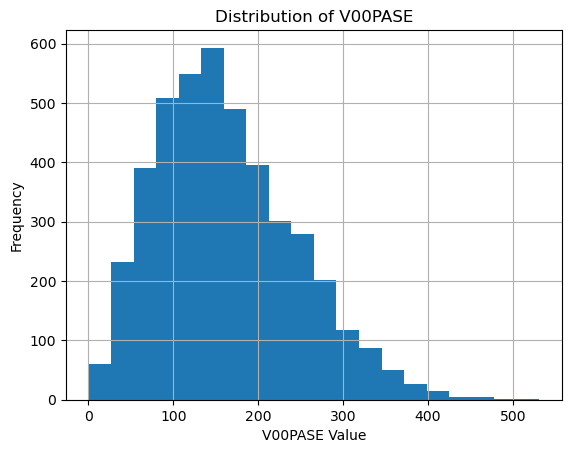

In [34]:
# Histogram to see the distribution
df['V00PASE'].dropna().hist(bins=20)  # 'dropna()' to exclude missing values, 'bins' can be adjusted
plt.title('Distribution of V00PASE')
plt.xlabel('V00PASE Value')
plt.ylabel('Frequency')
plt.show()



In [35]:
df.sort_values(by='V00PASE', ascending=True, inplace=True)

In [36]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V08IMAGESE,V08IMAGESF,V08IMAGESG,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
861,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3132,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3402,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
445,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2059,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


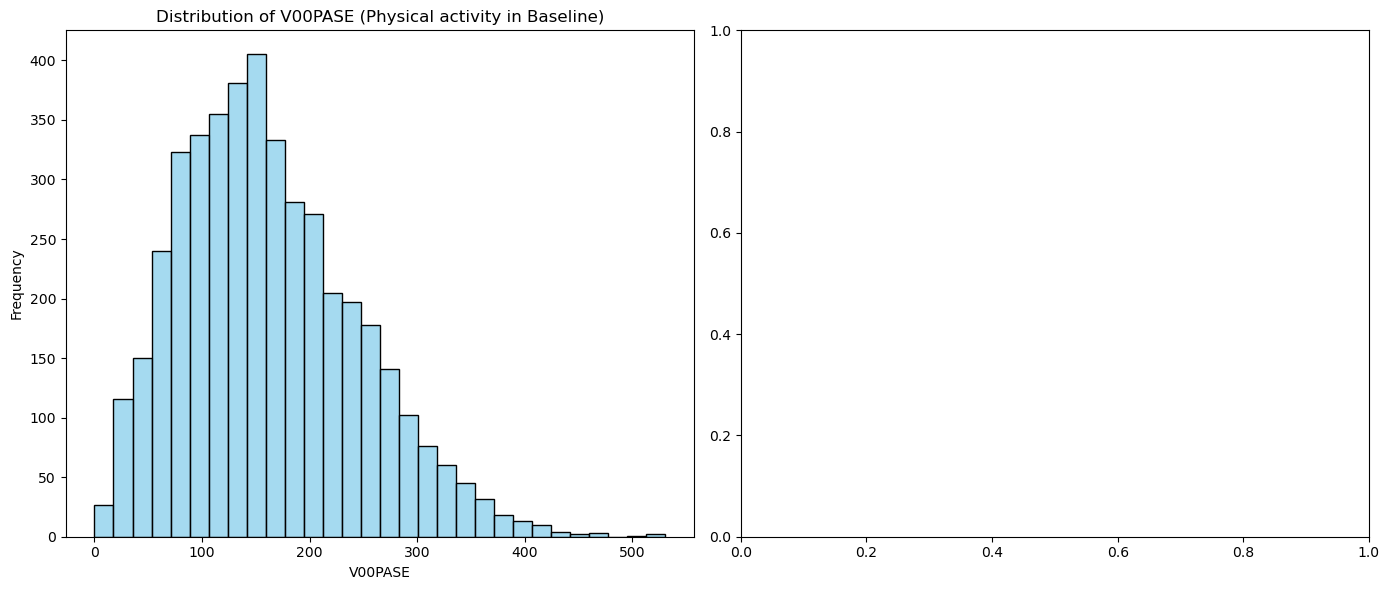

In [37]:
# Set the aesthetic style of the plots
# sns.set(style="whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of V00PASE
sns.histplot(data=df, x='V00PASE', bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of V00PASE (Physical activity in Baseline)')
axes[0].set_xlabel('V00PASE')
axes[0].set_ylabel('Frequency')



# Show the plot
plt.tight_layout()
plt.show()



##### Baseline

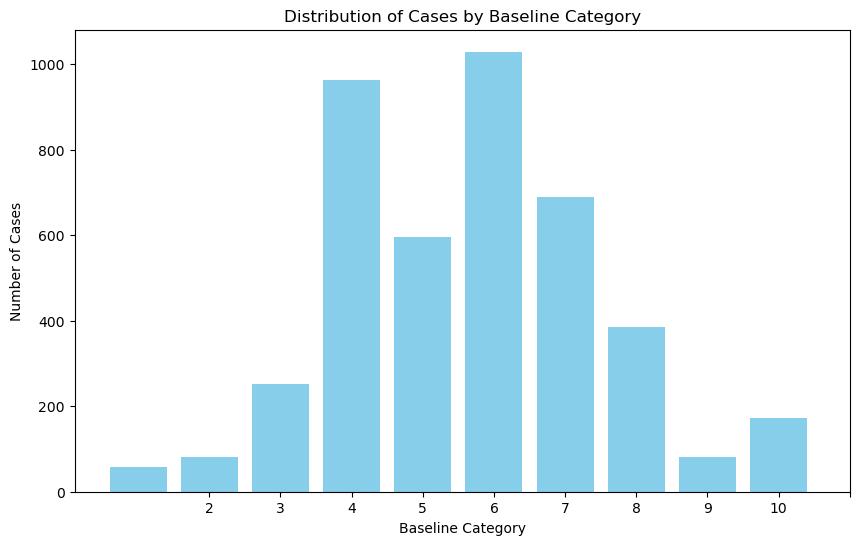

In [38]:
# Define the percentages
percentages = [1, 2, 6, 22, 14, 24, 16, 9, 2, 4]
cumulative_percentages = np.cumsum(percentages) / 100.0  # Normalizing to 0-1 range

# Calculate quantile values based on the cumulative percentages
quantile_breakpoints = df['V00PASE'].quantile(cumulative_percentages)

# Map the values of V00PASE to categories based on these quantile breakpoints
df['PA_baseline_category'] = pd.cut(df['V00PASE'], bins=[-np.inf] + quantile_breakpoints.tolist(), labels=range(1, 11))


# print(df.head())

# Count the number of cases per category
category_counts = df['PA_baseline_category'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index.astype(str), category_counts.values, color='skyblue')  # Convert index to string for x-axis labels
plt.xlabel('Baseline Category')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Baseline Category')
plt.xticks(range(1, 11))  # Ensure all categories are shown
plt.show()


In [39]:
######### Move PASE to the end of df
# Get a list of all columns except the ones we want to move to the end
columns = [col for col in df.columns if col not in ['V00PASE', 'V01PASE', 'PA_baseline_category']]

# Append the specific columns to the end of the list
columns.extend(['V00PASE', 'V01PASE', 'PA_baseline_category'])

# Reorder the DataFrame based on the new columns order
df = df[columns]

# Verify the new order of columns (You can comment this out in your final script)
print(df.columns)


Index(['ID', 'V00BLDCOLL', 'V00BLDHRS1', 'V00BLDHRS2', 'V00BLDRAW1',
       'V00BLDRAW2', 'V00BLSURD1', 'V00BLSURD2', 'V00CITRATE', 'V00EDTA',
       ...
       'V10IMAGESA', 'V10IMAGESB', 'V10IMAGESC', 'V10IMAGESD', 'V10IMAGESE',
       'V10IMAGESF', 'V10IMAGESG', 'V00PASE', 'V01PASE',
       'PA_baseline_category'],
      dtype='object', length=1818)


In [40]:
# Count the number of cases in each baseline category
cases_in_each_category = df['PA_baseline_category'].value_counts().sort_index()

# Print the result
print(cases_in_each_category)


PA_baseline_category
1       58
2       81
3      251
4      963
5      595
6     1029
7      690
8      386
9       82
10     173
Name: count, dtype: int64


In [41]:
# Group by the 'PA_baseline_category' and calculate min and max of 'V00PASE' for each category
category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])

# Display the result
print(category_ranges)


                        min    max
PA_baseline_category              
1                       0.0   25.0
2                      26.0   34.0
3                      35.0   59.0
4                      60.0  114.0
5                     115.0  142.0
6                     143.0  196.0
7                     197.0  252.0
8                     253.0  303.0
9                     304.0  322.0
10                    323.0  531.0


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/4263173758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/4263173758.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/4263173758.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of p

In [42]:
# Group by 'PA_baseline_category' and collect all 'V00PASE' values in lists for each category
cases_per_category = df.groupby('PA_baseline_category')['V00PASE'].agg(list)

# Display the result
print(cases_per_category)


PA_baseline_category
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...
2     [26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27....
3     [35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 37....
4     [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60....
5     [115.0, 115.0, 115.0, 115.0, 115.0, 115.0, 115...
6     [143.0, 143.0, 143.0, 143.0, 143.0, 143.0, 143...
7     [197.0, 197.0, 197.0, 197.0, 197.0, 197.0, 197...
8     [253.0, 253.0, 253.0, 253.0, 254.0, 254.0, 254...
9     [304.0, 304.0, 305.0, 305.0, 305.0, 305.0, 305...
10    [323.0, 324.0, 324.0, 324.0, 324.0, 325.0, 325...
Name: V00PASE, dtype: object


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3322909380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_per_category = df.groupby('PA_baseline_category')['V00PASE'].agg(list)


In [43]:
# Count the number of cases in each baseline category
category_counts = df['PA_baseline_category'].value_counts().sort_index()

# Print the result
print(category_counts)


PA_baseline_category
1       58
2       81
3      251
4      963
5      595
6     1029
7      690
8      386
9       82
10     173
Name: count, dtype: int64


In [44]:
# Group by 'PA_baseline_category' and count occurrences of each 'V00PASE' value within these groups
value_counts_per_category = df.groupby('PA_baseline_category')['V00PASE'].value_counts()

# Print the result
print(value_counts_per_category)


PA_baseline_category  V00PASE
1                     25.0       25
                      0.0         7
                      9.0         3
                      21.0        3
                      2.0         2
                                 ..
10                    318.0       0
                      319.0       0
                      320.0       0
                      321.0       0
                      322.0       0
Name: count, Length: 3960, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/2182791114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts_per_category = df.groupby('PA_baseline_category')['V00PASE'].value_counts()


In [45]:
# # Set pandas to display more rows if necessary
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Auto-detect the display width
# pd.set_option('display.max_colwidth', None)  # Show full width of columns

# # Group by 'PA_baseline_category' and count occurrences of each 'V00PASE' value within these groups
# value_counts_per_category = df.groupby('PA_baseline_category')['V00PASE'].value_counts()

# # Print the full result
# print(value_counts_per_category)


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/592595273.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/592595273.py:9: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/592595273.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pand

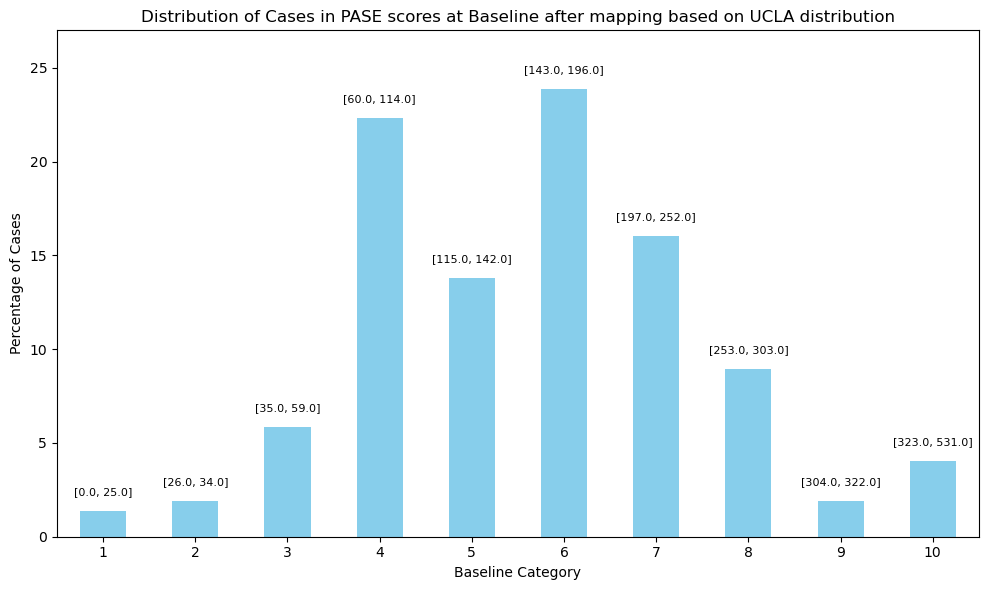

In [46]:
# Calculate the counts of cases in each category for plotting
category_counts = df['PA_baseline_category'].value_counts().sort_index()

# Calculate percentages for each category
total_cases = category_counts.sum()
category_percentages = (category_counts / total_cases * 100).round(2)

# Calculate min and max of V00PASE for each category
category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
category_percentages.plot(kind='bar', color='skyblue', ax=ax)

# Adjust y-limit to create space for annotations
plt.ylim(0, 27)

# Annotate each bar with the min and max values
for i, (idx, percentage) in enumerate(category_percentages.items()):
    min_val = category_ranges.loc[idx, 'min']
    max_val = category_ranges.loc[idx, 'max']
    annotation_text = f'[{min_val}, {max_val}]'
    ax.annotate(annotation_text, (i, percentage), textcoords="offset points", xytext=(0,10),
                ha='center', va='bottom', fontsize=8)

# Set labels and title
ax.set_xlabel('Baseline Category')
ax.set_ylabel('Percentage of Cases')
ax.set_title('Distribution of Cases in PASE scores at Baseline after mapping based on UCLA distribution')
ax.set_xticklabels(range(1, len(category_counts) + 1), rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


##### Is there overlap?

In [47]:
# Calculate min and max of V00PASE for each category
category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])

# Shift the 'max' column down to compare with the 'min' of the next category
category_ranges['shifted_max'] = category_ranges['max'].shift(1)

# Check for overlap by comparing if the min of the current category is less than or equal to
# the shifted_max of the previous category
category_ranges['has_overlap'] = category_ranges['min'] <= category_ranges['shifted_max']

# Print the result to see which categories have overlap
print(category_ranges[['min', 'shifted_max', 'has_overlap']])


                        min  shifted_max  has_overlap
PA_baseline_category                                 
1                       0.0          NaN        False
2                      26.0         25.0        False
3                      35.0         34.0        False
4                      60.0         59.0        False
5                     115.0        114.0        False
6                     143.0        142.0        False
7                     197.0        196.0        False
8                     253.0        252.0        False
9                     304.0        303.0        False
10                    323.0        322.0        False


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3164529900.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3164529900.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3164529900.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of p

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/2658527820.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/2658527820.py:9: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/2658527820.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of p

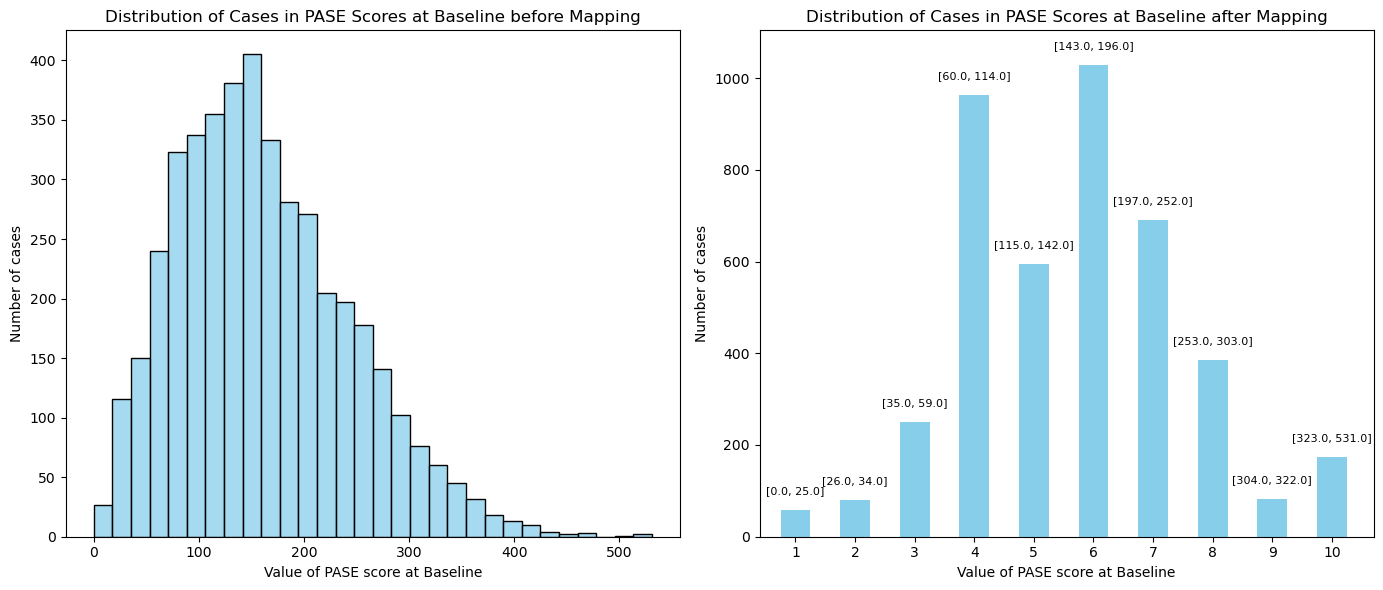

In [48]:

# Calculate the counts of cases in each category for plotting
category_counts = df['PA_baseline_category'].value_counts().sort_index()

# Calculate percentages for each category
total_cases = category_counts.sum()
category_percentages = (category_counts / total_cases * 100).round(2)

# Calculate min and max of V00PASE for each category
category_ranges = df.groupby('PA_baseline_category')['V00PASE'].agg([min, max])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of V00PASE
sns.histplot(data=df, x='V00PASE', bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Cases in PASE Scores at Baseline before Mapping')
axes[0].set_xlabel('Value of PASE score at Baseline')
axes[0].set_ylabel('Number of cases')

# Create a bar plot for the percentages
category_counts.plot(kind='bar', color='skyblue', ax=axes[1])

# Adjust y-limit to create space for annotations
axes[1].set_ylim(0, category_counts.max() + 75)  # Increase the y-limit for better spacing

# Adjust x-limit to create space for annotations
axes[1].set_xlim(-0.6, len(category_counts) - 0.3)

# Annotate each bar with the min and max values
for i, (idx, count) in enumerate(category_counts.items()):
    min_val = category_ranges.loc[idx, 'min']
    max_val = category_ranges.loc[idx, 'max']
    annotation_text = f'[{min_val}, {max_val}]'
    axes[1].annotate(annotation_text, (i, count), textcoords="offset points", xytext=(0,10),
                     ha='center', va='bottom', fontsize=8)

# Set labels and title for the bar plot
axes[1].set_xlabel('Value of PASE score at Baseline')
axes[1].set_ylabel('Number of cases')
axes[1].set_title('Distribution of Cases in PASE Scores at Baseline after Mapping')
axes[1].set_xticklabels(range(1, len(category_counts) + 1), rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1
861,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1
3132,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10
3402,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10
445,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10
2059,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10


##### Follow up:

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/406299137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA_followup_category'] = pd.cut(df['V01PASE'], bins=[-np.inf] + quantile_breakpoints.tolist(), labels=range(1, 11))


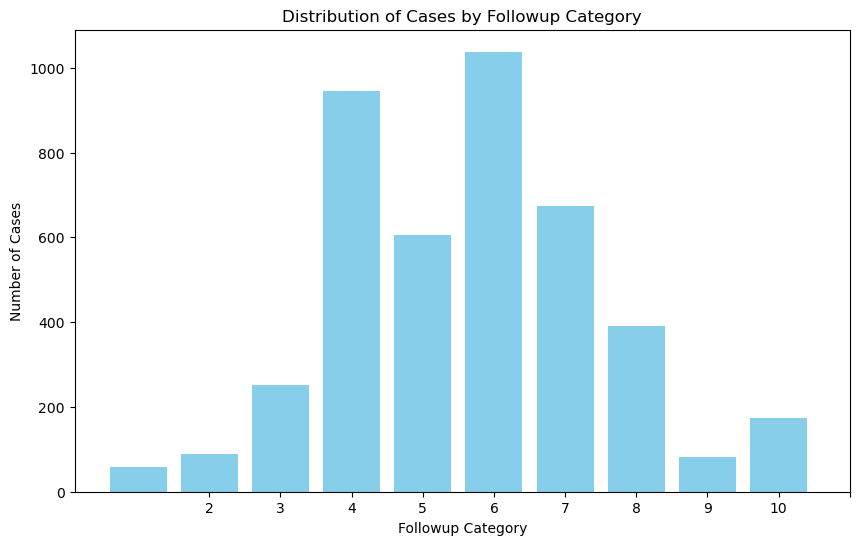

In [50]:
# Define the percentages
percentages = [1, 2, 6, 22, 14, 24, 16, 9, 2, 4]
cumulative_percentages = np.cumsum(percentages) / 100.0  # Normalizing to 0-1 range

# Calculate quantile values based on the cumulative percentages
quantile_breakpoints = df['V01PASE'].quantile(cumulative_percentages)

# Map the values of V01PASE to categories based on these quantile breakpoints
df['PA_followup_category'] = pd.cut(df['V01PASE'], bins=[-np.inf] + quantile_breakpoints.tolist(), labels=range(1, 11))


# print(df.head())

# Count the number of cases per category
category_counts = df['PA_followup_category'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index.astype(str), category_counts.values, color='skyblue')  # Convert index to string for x-axis labels
plt.xlabel('Followup Category')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Followup Category')
plt.xticks(range(1, 11))  # Ensure all categories are shown
plt.show()

In [51]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,1
861,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1,3
3132,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1,4
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10,6
3402,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10,5
445,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10,10
2059,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10,8


In [52]:
df.to_csv('outcomes/2.pre_preprocessed_OAI.csv', index=False)

In [53]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,1
861,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1,3
3132,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1,4
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10,6
3402,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10,5
445,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10,10
2059,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10,8


##### Increase/Decrease

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3670349047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA_followup_category_code'] = df['PA_followup_category'].cat.codes
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3670349047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA_baseline_category_code'] = df['PA_baseline_category'].cat.codes
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/3670349047.py:6: SettingWithCopyWarning: 
A value

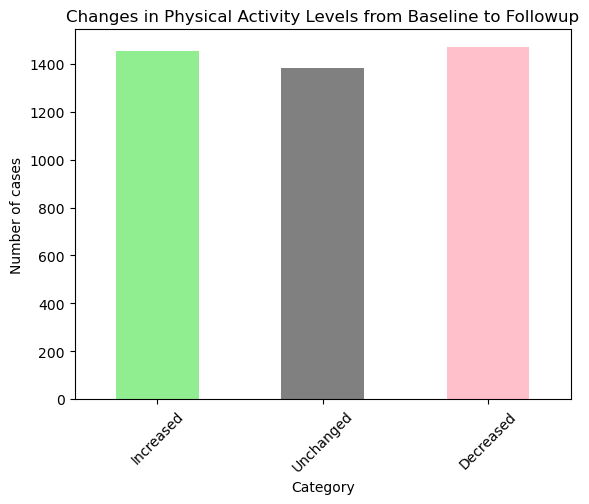

In [54]:
# Convert categories to codes if they are ordinal
df['PA_followup_category_code'] = df['PA_followup_category'].cat.codes
df['PA_baseline_category_code'] = df['PA_baseline_category'].cat.codes

# Calculate the difference
df['change'] = df['PA_followup_category_code'] - df['PA_baseline_category_code']

# Define the function to categorize changes
def categorize_change(change):
    if change > 0:
        return 'Increased'
    elif change < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

# Apply the function to categorize changes
df['change_category'] = df['change'].apply(categorize_change)

# Calculate counts for each category of change
change_counts = df['change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Physical Activity Levels from Baseline to Followup')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

plt.show()


In [55]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category,PA_followup_category_code,PA_baseline_category_code,change,change_category
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,Unchanged
861,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,37.0,1,3,2,0,2,Increased
3132,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,61.0,1,4,3,0,3,Increased
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,Unchanged
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,Unchanged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,470.0,184.0,10,6,5,9,-4,Decreased
3402,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,477.0,135.0,10,5,4,9,-5,Decreased
445,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,504.0,580.0,10,10,9,9,0,Unchanged
2059,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,516.0,268.0,10,8,7,9,-2,Decreased


In [56]:
# Count how many cases are in each category
change_counts = df['change_category'].value_counts()

# Display the counts
print(change_counts)

# If you wish to calculate percentages
change_percentages = df['change_category'].value_counts(normalize=True) * 100
print(change_percentages)

change_category
Decreased    1471
Increased    1456
Unchanged    1381
Name: count, dtype: int64
change_category
Decreased    34.145775
Increased    33.797586
Unchanged    32.056639
Name: proportion, dtype: float64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/1198215890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA_followup_category_code'] = df['PA_followup_category'].cat.codes
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/1198215890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA_baseline_category_code'] = df['PA_baseline_category'].cat.codes
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_93683/1198215890.py:6: SettingWithCopyWarning: 
A value

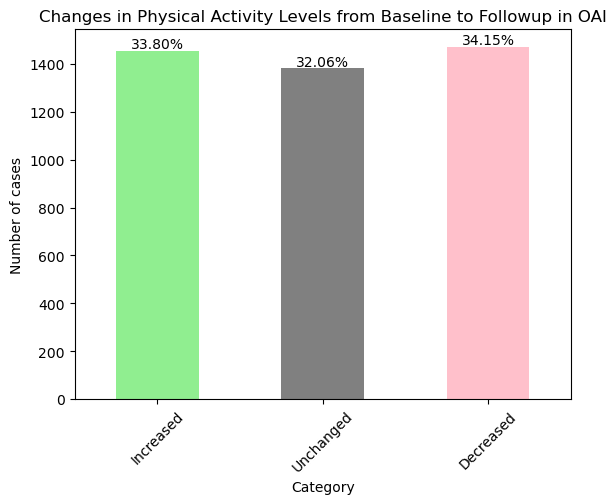

In [57]:
# Convert categories to codes if they are ordinal
df['PA_followup_category_code'] = df['PA_followup_category'].cat.codes
df['PA_baseline_category_code'] = df['PA_baseline_category'].cat.codes

# Calculate the difference
df['change'] = df['PA_followup_category_code'] - df['PA_baseline_category_code']

# Define the function to categorize changes
def categorize_change(change):
    if change > 0:
        return 'Increased'
    elif change < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

# Apply the function to categorize changes
df['change_category'] = df['change'].apply(categorize_change)

# Calculate counts for each category of change
change_counts = df['change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Physical Activity Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [58]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category,PA_followup_category_code,PA_baseline_category_code,change,change_category
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,Unchanged
861,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,37.0,1,3,2,0,2,Increased
3132,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,61.0,1,4,3,0,3,Increased
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,Unchanged
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,Unchanged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,470.0,184.0,10,6,5,9,-4,Decreased
3402,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,477.0,135.0,10,5,4,9,-5,Decreased
445,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,504.0,580.0,10,10,9,9,0,Unchanged
2059,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,516.0,268.0,10,8,7,9,-2,Decreased
